# This HAS to be done only half so far maybe less then

In [1]:
import pandas as pd
import numpy as np
import os
from env import hostname, user, password

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

import wrangle 
import warnings 
warnings.filterwarnings("ignore")
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer

In [2]:
df = wrangle.zillow_data()

In [3]:
df = wrangle.wrangled_zillow(df)

In [4]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
1,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
2,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
3,3.0,1.0,1244.0,169471.0,1950.0,2532.88,6037.0
4,3.0,2.0,1300.0,233266.0,1950.0,3110.99,6037.0


In [5]:
train, validate, test = wrangle.traintestsplit(df)

In [6]:
train.head(5)

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
1618260,4.0,3.0,2281.0,398552.0,1994.0,5119.38,6059.0
243079,4.0,2.0,1691.0,108264.0,1964.0,1500.33,6037.0
1294944,3.0,2.0,1677.0,135962.0,1969.0,1359.26,6059.0
189599,3.0,2.0,1627.0,101427.0,1942.0,1159.25,6037.0
48346,4.0,2.0,1146.0,37576.0,1955.0,736.77,6037.0


In [7]:
def plot_variable_pairs(train):
    columns = ["bedroomcnt","bathroomcnt","calculatedfinishedsquarefeet","yearbuilt","taxamount"]
    for col in columns:
        sns.lmplot(x = col, y = 'taxvaluedollarcnt', hue= "fips", data = train, x_bins=20)

In [8]:
columns = ["bedroomcnt","bathroomcnt","calculatedfinishedsquarefeet","yearbuilt","taxamount"]

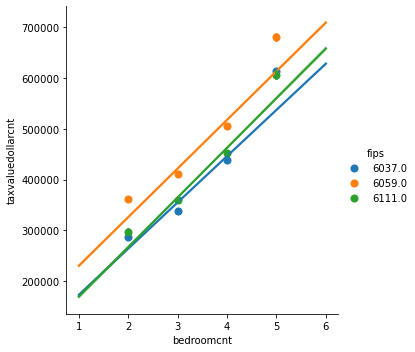

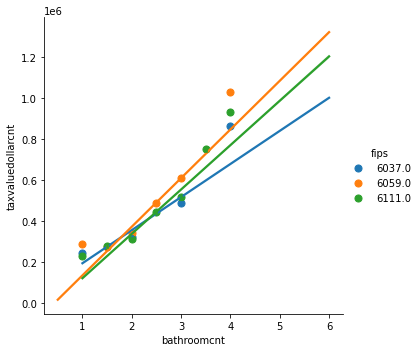

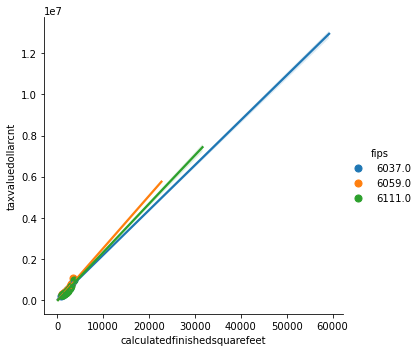

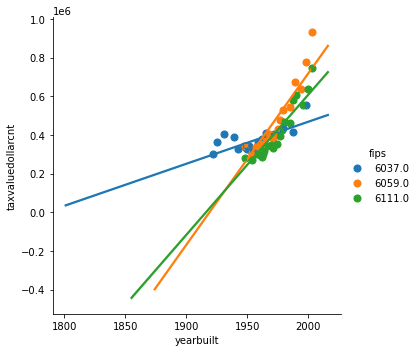

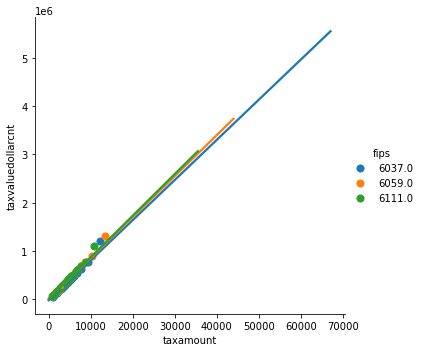

In [9]:
for col in columns:
    sns.lmplot(x = col, y = 'taxvaluedollarcnt', hue= "fips", data = train, x_bins=20)

From the graph I have illustrated with previous codethis tells me that I should do somehting about the heavy outliers.

In [10]:
train.fips.value_counts()

6037.0    778026
6059.0    302079
6111.0     89946
Name: fips, dtype: int64

In [11]:
train.bathroomcnt.value_counts()

2.00    526866
3.00    233132
1.00    230135
2.50     79479
4.00     41800
1.50     17374
3.50     14911
5.00     11632
4.50      9411
6.00      2965
5.50      2339
0.50         5
1.75         2
Name: bathroomcnt, dtype: int64

## Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

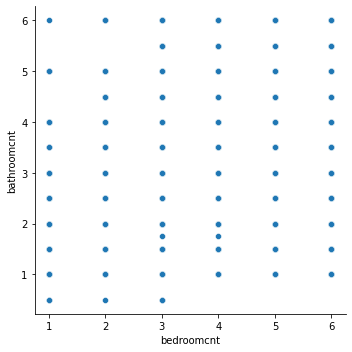

In [13]:
sns.relplot(x=train.bedroomcnt , y=train.bathroomcnt, data=train)

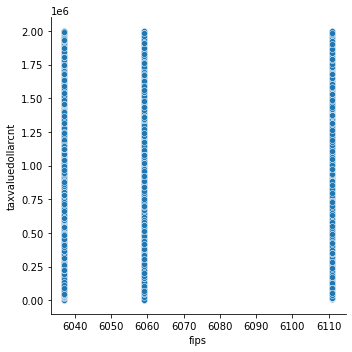

In [14]:
sns.relplot(x=train.fips , y=train.taxvaluedollarcnt)

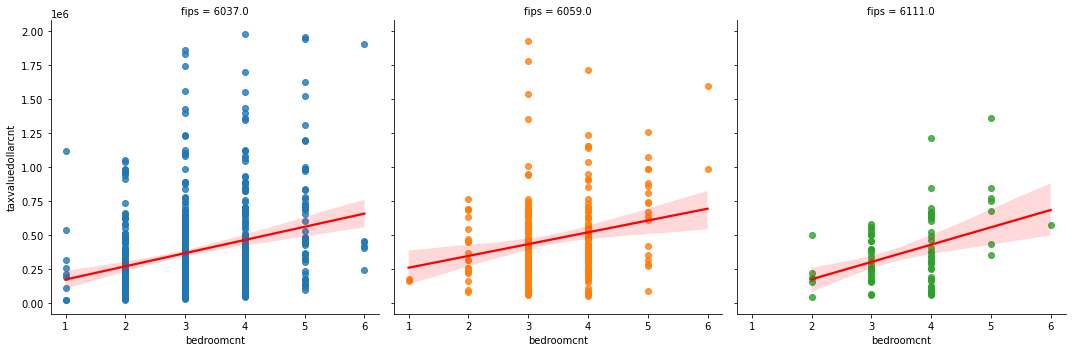

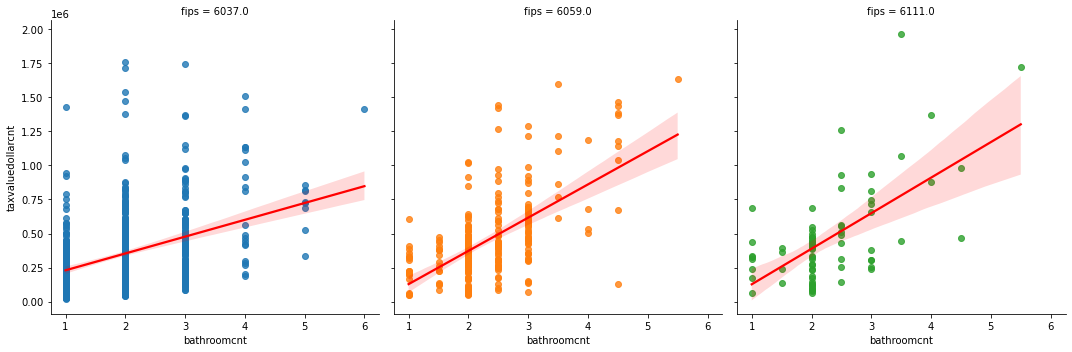

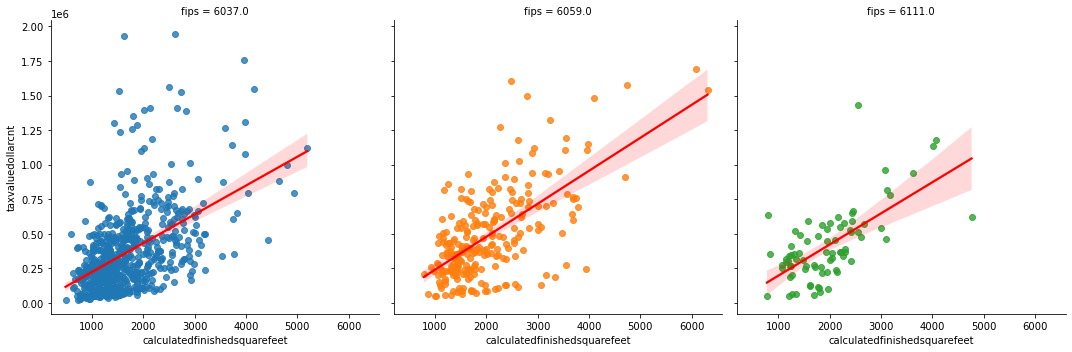

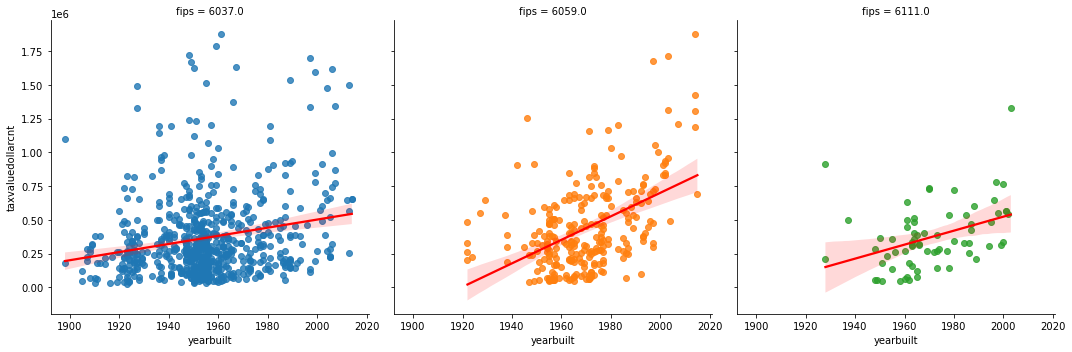

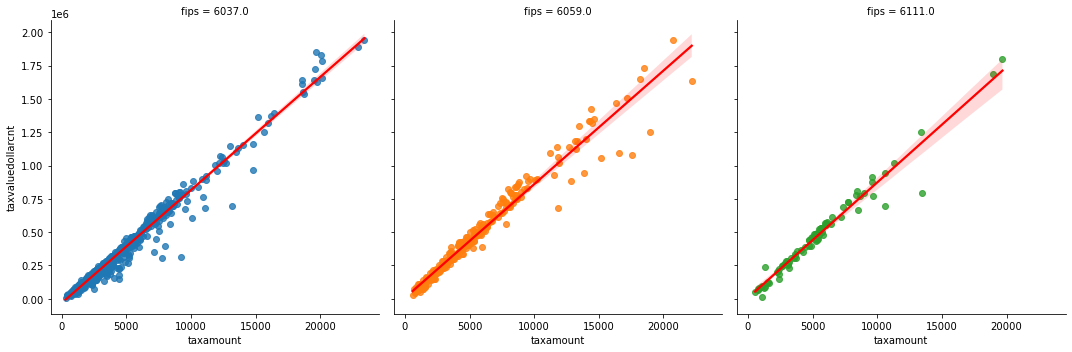

In [15]:
for col in columns:
    sns.lmplot(data=train.sample(1000), hue = 'fips', col= 'fips', y='taxvaluedollarcnt', x = col, line_kws={'color': 'red'})

The graph above tells me that I should change fips into a more human and computer freindly code

Limiting factors that we wish we knew: Time, Family Size, Demand, Budgets

# Stratify on fips
##  huge takeaway
### data now stratified on fips

In [27]:
train['fips'] = train['fips'].replace(6037, 'Los_Angelos')
train['fips'] = train['fips'].replace(6059, 'Orange_County')
train['fips'] = train['fips'].replace(6111, 'Ventura_County')

In [22]:
train.calculatedfinishedsquarefeet.value_counts()

1200.0    2903
1120.0    2438
1080.0    2401
1400.0    2138
1440.0    2011
          ... 
5842.0       1
6060.0       1
5999.0       1
316.0        1
196.0        1
Name: calculatedfinishedsquarefeet, Length: 6490, dtype: int64

In [23]:
train.shape

(1170051, 7)

<AxesSubplot:xlabel='fips', ylabel='calculatedfinishedsquarefeet'>

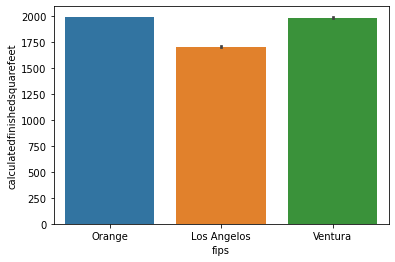

In [25]:
sns.barplot(x=train.fips, y=train.calculatedfinishedsquarefeet)

KeyboardInterrupt: 

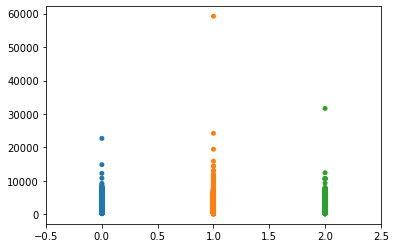

In [29]:
sns.swarmplot(x=train.fips, y=train.calculatedfinishedsquarefeet)